In [1]:
import music21

In [2]:
import os
from music21 import converter

def import_and_parse_krn_files(folder_path):
    # List all files in the given folder
    files = os.listdir(folder_path)
    
    # Filter out all files with the .krn extension
    krn_files = [file for file in files if file.endswith('.krn')]
    
    # Create a list to hold music21 stream objects
    streams = []
    
    # Process each .krn file
    for file in krn_files:
        file_path = os.path.join(folder_path, file)
        print(f"Processing {file_path}")
        
        # Use music21 to parse the file into a stream object
        try:
            stream = converter.parse(file_path)
            streams.append(stream)
            print(f"Loaded {file} into music21 stream.")
        except Exception as e:
            print(f"Failed to parse {file}: {e}")
    
    return streams

# Usage
folder_path = './'  # Replace this with the path to your .krn files directory
all_streams = import_and_parse_krn_files(folder_path)


Processing ./wtc1f01.krn
Loaded wtc1f01.krn into music21 stream.
Processing ./wtc1f02.krn
Loaded wtc1f02.krn into music21 stream.
Processing ./wtc1f03.krn
Loaded wtc1f03.krn into music21 stream.
Processing ./wtc1f04.krn
Loaded wtc1f04.krn into music21 stream.
Processing ./wtc1f05.krn
Loaded wtc1f05.krn into music21 stream.
Processing ./wtc1f06.krn
Loaded wtc1f06.krn into music21 stream.
Processing ./wtc1f07.krn
Loaded wtc1f07.krn into music21 stream.
Processing ./wtc1f08.krn
Loaded wtc1f08.krn into music21 stream.
Processing ./wtc1f09.krn
Loaded wtc1f09.krn into music21 stream.
Processing ./wtc1f10.krn
Loaded wtc1f10.krn into music21 stream.
Processing ./wtc1f11.krn
Loaded wtc1f11.krn into music21 stream.
Processing ./wtc1f12.krn
Loaded wtc1f12.krn into music21 stream.
Processing ./wtc1f13.krn
Loaded wtc1f13.krn into music21 stream.
Processing ./wtc1f14.krn
Loaded wtc1f14.krn into music21 stream.
Processing ./wtc1f15.krn
Loaded wtc1f15.krn into music21 stream.
Processing ./wtc1f16.krn


In [4]:
def print_notes_from_first_stream(streams):
    if streams:
        first_stream = streams[0]
        print("Notes and Rests from the First Stream:")
        for note in first_stream.flat.notesAndRests:
            if note.isNote:
                print(f"Note: {note.pitch.nameWithOctave} Duration: {note.duration.quarterLength}")
            elif note.isRest:
                print(f"Rest Duration: {note.duration.quarterLength}")
            elif note.isChord:
                chord_pitches = '+'.join(p.nameWithOctave for p in note.pitches)
                print(f"Chord: {chord_pitches} Duration: {note.duration.quarterLength}")
    else:
        print("No streams to process.")
print_notes_from_first_stream(all_streams)

Notes and Rests from the First Stream:
Rest Duration: 4.0
Rest Duration: 0.5
Rest Duration: 4.0
Rest Duration: 4.0
Note: C4 Duration: 0.5
Note: D4 Duration: 0.5
Note: E4 Duration: 0.5
Note: F4 Duration: 0.75
Note: G4 Duration: 0.125
Note: F4 Duration: 0.125
Note: E4 Duration: 0.5
Note: A4 Duration: 0.5
Rest Duration: 2.0
Note: D4 Duration: 0.5
Rest Duration: 4.0
Rest Duration: 4.0
Note: G4 Duration: 0.5
Note: G4 Duration: 0.25
Note: A4 Duration: 0.25
Note: G4 Duration: 0.25
Note: F4 Duration: 0.25
Rest Duration: 0.5
Note: E4 Duration: 0.25
Note: F4 Duration: 0.25
Note: G4 Duration: 0.5
Note: E4 Duration: 0.25
Note: D4 Duration: 0.25
Note: A4 Duration: 0.5
Note: C4 Duration: 0.25
Note: D4 Duration: 0.25
Note: B4 Duration: 0.5
Note: C4 Duration: 0.25
Note: B3 Duration: 0.25
Note: C5 Duration: 0.75
Note: A3 Duration: 0.5
Rest Duration: 4.0
Rest Duration: 4.0
Note: F#4 Duration: 0.5
Note: D5 Duration: 0.125
Note: C5 Duration: 0.125
Note: B4 Duration: 0.5
Note: G4 Duration: 1.0
Note: E5 Dur

C:\Users\jackparsons210\anaconda3\Lib\site-packages\music21\stream\base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


In [5]:
from music21 import interval

def analyze_parts(streams):
    
    if streams:
        for stream_index, stream in enumerate(streams):
            print(f"\nAnalyzing Stream {stream_index + 1}:")
            parts = stream.parts
            print(f"Stream {stream_index + 1} has {len(parts)} parts.")

            for part_index, part in enumerate(parts):
                print(f"\nAnalyzing Part {part_index + 1} in Stream {stream_index + 1}:")
                # Filtering to only include notes and chords
                notes_list = [n for n in part.recurse().notesAndRests if n.isNote or n.isChord]

                if not notes_list:
                    print("No notes or chords in this part.")
                    continue

                # Function to get the highest pitch from a Note or Chord
                def get_highest_pitch(element):
                    if element.isNote:
                        return element.pitch
                    elif element.isChord:
                        return max(element.pitches, key=lambda p: p.midi)

                # Function to get the lowest pitch from a Note or Chord
                def get_lowest_pitch(element):
                    if element.isNote:
                        return element.pitch
                    elif element.isChord:
                        return min(element.pitches, key=lambda p: p.midi)

                highest_element = max(notes_list, key=get_highest_pitch)
                lowest_element = min(notes_list, key=get_lowest_pitch)

                # Extracting pitch info correctly depending on type
                highest_pitch = get_highest_pitch(highest_element)
                lowest_pitch = get_lowest_pitch(lowest_element)

                print(f"Highest Note: {highest_pitch.nameWithOctave} (Offset: {highest_element.offset}, Duration: {highest_element.duration.quarterLength}, Measure: {highest_element.measureNumber})")
                print(f"Lowest Note: {lowest_pitch.nameWithOctave} (Offset: {lowest_element.offset}, Duration: {lowest_element.duration.quarterLength}, Measure: {lowest_element.measureNumber})")

                # Calculating the interval
                pitch_interval = interval.Interval(noteStart=lowest_pitch, noteEnd=highest_pitch)
                print(f"Interval between highest and lowest notes: {pitch_interval.name} ({pitch_interval.semiSimpleName})")

    else:
        print("No streams to process.")

# Example usage
analyze_parts(all_streams)



Analyzing Stream 1:
Stream 1 has 4 parts.

Analyzing Part 1 in Stream 1:
Highest Note: C6 (Offset: 2.0, Duration: 2.0, Measure: 27)
Lowest Note: E4 (Offset: 3.25, Duration: 0.25, Measure: 5)
Interval between highest and lowest notes: m13 (m6)

Analyzing Part 2 in Stream 1:
Highest Note: G5 (Offset: 0.5, Duration: 0.5, Measure: 18)
Lowest Note: A3 (Offset: 0.0, Duration: 0.5, Measure: 3)
Interval between highest and lowest notes: m14 (m7)

Analyzing Part 3 in Stream 1:
Highest Note: G4 (Offset: 1.5, Duration: 0.5, Measure: 22)
Lowest Note: C3 (Offset: 0.5, Duration: 0.5, Measure: 24)
Interval between highest and lowest notes: P12 (P5)

Analyzing Part 4 in Stream 1:
Highest Note: D4 (Offset: 0.75, Duration: 0.25, Measure: 9)
Lowest Note: E2 (Offset: 2.0, Duration: 0.5, Measure: 20)
Interval between highest and lowest notes: m14 (m7)

Analyzing Stream 2:
Stream 2 has 3 parts.

Analyzing Part 1 in Stream 2:
Highest Note: C6 (Offset: 0.0, Duration: 0.5, Measure: 15)
Lowest Note: C4 (Offset

Highest Note: D5 (Offset: 2.0, Duration: 0.5, Measure: 80)
Lowest Note: A2 (Offset: 2.5, Duration: 0.25, Measure: 64)
Interval between highest and lowest notes: P18 (P4)

Analyzing Part 3 in Stream 15:
Highest Note: E4 (Offset: 2.0, Duration: 1.0, Measure: 13)
Lowest Note: C2 (Offset: 0.0, Duration: 0.25, Measure: 36)
Interval between highest and lowest notes: M17 (M3)

Analyzing Stream 16:
Stream 16 has 4 parts.

Analyzing Part 1 in Stream 16:
Highest Note: B-5 (Offset: 2.0, Duration: 0.5, Measure: 18)
Lowest Note: C#4 (Offset: 0.0, Duration: 1.0, Measure: 3)
Interval between highest and lowest notes: d14 (d7)

Analyzing Part 2 in Stream 16:
Highest Note: F5 (Offset: 2.5, Duration: 0.25, Measure: 19)
Lowest Note: E3 (Offset: 3.0, Duration: 0.5, Measure: 3)
Interval between highest and lowest notes: m16 (m2)

Analyzing Part 3 in Stream 16:
Highest Note: F4 (Offset: 0.0, Duration: 0.75, Measure: 15)
Lowest Note: C3 (Offset: 1.0, Duration: 0.5, Measure: 13)
Interval between highest and l

Highest Note: C#6 (Offset: 3.5, Duration: 0.25, Measure: 25)
Lowest Note: G#3 (Offset: 3.25, Duration: 0.25, Measure: 33)
Interval between highest and lowest notes: P18 (P4)

Analyzing Part 2 in Stream 27:
Highest Note: E#5 (Offset: 1.5, Duration: 0.5, Measure: 30)
Lowest Note: D#3 (Offset: 2.75, Duration: 0.25, Measure: 33)
Interval between highest and lowest notes: M16 (M2)

Analyzing Part 3 in Stream 27:
Highest Note: G#4 (Offset: 0.0, Duration: 0.25, Measure: 31)
Lowest Note: C#2 (Offset: 0.0, Duration: 0.5, Measure: 4)
Interval between highest and lowest notes: P19 (P5)

Analyzing Stream 28:
Stream 28 has 3 parts.

Analyzing Part 1 in Stream 28:
Highest Note: B5 (Offset: 1.5, Duration: 0.25, Measure: 24)
Lowest Note: F#3 (Offset: 0.75, Duration: 0.25, Measure: 13)
Interval between highest and lowest notes: P18 (P4)

Analyzing Part 2 in Stream 28:
Highest Note: F#5 (Offset: 1.5, Duration: 0.25, Measure: 26)
Lowest Note: B2 (Offset: 2.0, Duration: 0.25, Measure: 12)
Interval between

Highest Note: B-5 (Offset: 0.0, Duration: 0.75, Measure: 19)
Lowest Note: C#4 (Offset: 0.0, Duration: 0.5, Measure: 17)
Interval between highest and lowest notes: d14 (d7)

Analyzing Part 2 in Stream 40:
Highest Note: G5 (Offset: 2.0, Duration: 0.25, Measure: 59)
Lowest Note: F#3 (Offset: 0.0, Duration: 0.5, Measure: 13)
Interval between highest and lowest notes: m16 (m2)

Analyzing Part 3 in Stream 40:
Highest Note: A4 (Offset: 2.0, Duration: 0.25, Measure: 26)
Lowest Note: B2 (Offset: 0.0, Duration: 0.5, Measure: 55)
Interval between highest and lowest notes: m14 (m7)

Analyzing Part 4 in Stream 40:
Highest Note: E-4 (Offset: 2.0, Duration: 0.25, Measure: 42)
Lowest Note: C2 (Offset: 0.25, Duration: 0.25, Measure: 49)
Interval between highest and lowest notes: m17 (m3)

Analyzing Stream 41:
Stream 41 has 4 parts.

Analyzing Part 1 in Stream 41:
Highest Note: C6 (Offset: 1.5, Duration: 0.5, Measure: 3)
Lowest Note: B3 (Offset: 1.0, Duration: 0.5, Measure: 27)
Interval between highest 

In [6]:
from music21 import interval

def analyze_parts(streams):
    stream_dict = {}
    if streams:
        for stream_index, stream in enumerate(streams):
            print(f"\nAnalyzing Stream {stream_index + 1}:")
            parts = stream.parts
            print(f"Stream {stream_index + 1} has {len(parts)} parts.")

            for part_index, part in enumerate(parts):
                print(f"\nAnalyzing Part {part_index + 1} in Stream {stream_index + 1}:")
                # Filtering to only include notes and chords
                notes_list = [n for n in part.recurse().notesAndRests if n.isNote or n.isChord]

                if not notes_list:
                    print("No notes or chords in this part.")
                    continue

                # Function to get the highest pitch from a Note or Chord
                def get_highest_pitch(element):
                    if element.isNote:
                        return element.pitch
                    elif element.isChord:
                        return max(element.pitches, key=lambda p: p.midi)

                # Function to get the lowest pitch from a Note or Chord
                def get_lowest_pitch(element):
                    if element.isNote:
                        return element.pitch
                    elif element.isChord:
                        return min(element.pitches, key=lambda p: p.midi)

                highest_element = max(notes_list, key=get_highest_pitch)
                lowest_element = min(notes_list, key=get_lowest_pitch)

                # Extracting pitch info correctly depending on type
                highest_pitch = get_highest_pitch(highest_element)
                lowest_pitch = get_lowest_pitch(lowest_element)

                print(f"Highest Note: {highest_pitch.nameWithOctave} (Offset: {highest_element.offset}, Duration: {highest_element.duration.quarterLength}, Measure: {highest_element.measureNumber})")
                print(f"Lowest Note: {lowest_pitch.nameWithOctave} (Offset: {lowest_element.offset}, Duration: {lowest_element.duration.quarterLength}, Measure: {lowest_element.measureNumber})")

                # Calculating the interval
                pitch_interval = interval.Interval(noteStart=lowest_pitch, noteEnd=highest_pitch)
                print(f"Interval between highest and lowest notes: {pitch_interval.name} ({pitch_interval.semiSimpleName})")
                stream_dict[str(part_index) + "-" + str(stream_index)] = pitch_interval.name
    
    else:
        print("No streams to process.")
    return stream_dict
# Example usage
analyze_parts(all_streams)
stream_dict= analyze_parts(all_streams)
stream_dict


Analyzing Stream 1:
Stream 1 has 4 parts.

Analyzing Part 1 in Stream 1:
Highest Note: C6 (Offset: 2.0, Duration: 2.0, Measure: 27)
Lowest Note: E4 (Offset: 3.25, Duration: 0.25, Measure: 5)
Interval between highest and lowest notes: m13 (m6)

Analyzing Part 2 in Stream 1:
Highest Note: G5 (Offset: 0.5, Duration: 0.5, Measure: 18)
Lowest Note: A3 (Offset: 0.0, Duration: 0.5, Measure: 3)
Interval between highest and lowest notes: m14 (m7)

Analyzing Part 3 in Stream 1:
Highest Note: G4 (Offset: 1.5, Duration: 0.5, Measure: 22)
Lowest Note: C3 (Offset: 0.5, Duration: 0.5, Measure: 24)
Interval between highest and lowest notes: P12 (P5)

Analyzing Part 4 in Stream 1:
Highest Note: D4 (Offset: 0.75, Duration: 0.25, Measure: 9)
Lowest Note: E2 (Offset: 2.0, Duration: 0.5, Measure: 20)
Interval between highest and lowest notes: m14 (m7)

Analyzing Stream 2:
Stream 2 has 3 parts.

Analyzing Part 1 in Stream 2:
Highest Note: C6 (Offset: 0.0, Duration: 0.5, Measure: 15)
Lowest Note: C4 (Offset

Highest Note: F5 (Offset: 0.0, Duration: 0.5, Measure: 31)
Lowest Note: E3 (Offset: 1.5, Duration: 0.25, Measure: 15)
Interval between highest and lowest notes: m16 (m2)

Analyzing Part 3 in Stream 21:
Highest Note: F4 (Offset: 2.0, Duration: 0.25, Measure: 28)
Lowest Note: E-2 (Offset: 2.0, Duration: 0.5, Measure: 21)
Interval between highest and lowest notes: M16 (M2)

Analyzing Stream 22:
Stream 22 has 5 parts.

Analyzing Part 1 in Stream 22:
Highest Note: C6 (Offset: 2.0, Duration: 2.0, Measure: 11)
Lowest Note: F4 (Offset: 2.0, Duration: 2.0, Measure: 1)
Interval between highest and lowest notes: P12 (P5)

Analyzing Part 2 in Stream 22:
Highest Note: G-5 (Offset: 1.0, Duration: 1.0, Measure: 28)
Lowest Note: B-3 (Offset: 2.0, Duration: 2.0, Measure: 3)
Interval between highest and lowest notes: m13 (m6)

Analyzing Part 3 in Stream 22:
Highest Note: F5 (Offset: 1.0, Duration: 1.0, Measure: 29)
Lowest Note: F3 (Offset: 2.0, Duration: 2.0, Measure: 10)
Interval between highest and lo

Highest Note: F#5 (Offset: 0.0, Duration: 2.0, Measure: 80)
Lowest Note: F#3 (Offset: 2.0, Duration: 1.0, Measure: 4)
Interval between highest and lowest notes: P15 (P8)

Analyzing Part 3 in Stream 37:
Highest Note: F#4 (Offset: 0.0, Duration: 1.0, Measure: 50)
Lowest Note: D#2 (Offset: 0.0, Duration: 1.0, Measure: 14)
Interval between highest and lowest notes: m17 (m3)

Analyzing Stream 38:
Stream 38 has 3 parts.

Analyzing Part 1 in Stream 38:
Highest Note: A5 (Offset: 3.5, Duration: 0.5, Measure: 14)
Lowest Note: B3 (Offset: 2.0, Duration: 1.0, Measure: 50)
Interval between highest and lowest notes: m14 (m7)

Analyzing Part 2 in Stream 38:
Highest Note: E5 (Offset: 1.5, Duration: 0.5, Measure: 58)
Lowest Note: E3 (Offset: 3.0, Duration: 1.0, Measure: 9)
Interval between highest and lowest notes: P15 (P8)

Analyzing Part 3 in Stream 38:
Highest Note: E4 (Offset: 0.25, Duration: 0.25, Measure: 45)
Lowest Note: C#2 (Offset: 0.5, Duration: 0.5, Measure: 32)
Interval between highest and 

Highest Note: G#5 (Offset: 3.5, Duration: 0.25, Measure: 28)
Lowest Note: A#2 (Offset: 1.0, Duration: 0.25, Measure: 23)
Interval between highest and lowest notes: m21 (m7)

Analyzing Part 3 in Stream 3:
Highest Note: C#5 (Offset: 1.0, Duration: 0.5, Measure: 39)
Lowest Note: C#2 (Offset: 2.0, Duration: 1.0, Measure: 34)
Interval between highest and lowest notes: P22 (P8)

Analyzing Stream 4:
Stream 4 has 5 parts.

Analyzing Part 1 in Stream 4:
Highest Note: B5 (Offset: 0.0, Duration: 4.0, Measure: 24)
Lowest Note: E#4 (Offset: 0.0, Duration: 2.0, Measure: 97)
Interval between highest and lowest notes: d12 (d5)

Analyzing Part 2 in Stream 4:
Highest Note: E5 (Offset: 2.0, Duration: 2.0, Measure: 45)
Lowest Note: B3 (Offset: 2.0, Duration: 2.0, Measure: 22)
Interval between highest and lowest notes: P11 (P4)

Analyzing Part 3 in Stream 4:
Highest Note: B4 (Offset: 2.0, Duration: 2.0, Measure: 39)
Lowest Note: B#2 (Offset: 3.0, Duration: 0.5, Measure: 59)
Interval between highest and low

Highest Note: F#5 (Offset: 3.0, Duration: 0.5, Measure: 20)
Lowest Note: A#3 (Offset: 3.0, Duration: 0.5, Measure: 5)
Interval between highest and lowest notes: m13 (m6)

Analyzing Part 3 in Stream 23:
Highest Note: B4 (Offset: 2.25, Duration: 0.25, Measure: 28)
Lowest Note: B2 (Offset: 0.0, Duration: 0.5, Measure: 16)
Interval between highest and lowest notes: P15 (P8)

Analyzing Part 4 in Stream 23:
Highest Note: F#4 (Offset: 2.0, Duration: 0.5, Measure: 10)
Lowest Note: C#2 (Offset: 3.5, Duration: 0.5, Measure: 17)
Interval between highest and lowest notes: P18 (P4)

Analyzing Stream 24:
Stream 24 has 4 parts.

Analyzing Part 1 in Stream 24:
Highest Note: C#6 (Offset: 3.25, Duration: 0.25, Measure: 36)
Lowest Note: E4 (Offset: 2.25, Duration: 0.25, Measure: 44)
Interval between highest and lowest notes: M13 (M6)

Analyzing Part 2 in Stream 24:
Highest Note: A5 (Offset: 0.5, Duration: 0.25, Measure: 39)
Lowest Note: G3 (Offset: 0.0, Duration: 1.0, Measure: 30)
Interval between highes

Highest Note: B5 (Offset: 1.0, Duration: 1.0, Measure: 8)
Lowest Note: G3 (Offset: 2.0, Duration: 1/3, Measure: 53)
Interval between highest and lowest notes: M17 (M3)

Analyzing Part 2 in Stream 34:
Highest Note: F#5 (Offset: 11/3, Duration: 1/3, Measure: 40)
Lowest Note: A#2 (Offset: 2.0, Duration: 2.0, Measure: 69)
Interval between highest and lowest notes: m20 (m6)

Analyzing Part 3 in Stream 34:
Highest Note: G4 (Offset: 3.0, Duration: 1.0, Measure: 20)
Lowest Note: D#2 (Offset: 5/3, Duration: 1/3, Measure: 71)
Interval between highest and lowest notes: d18 (d4)

Analyzing Stream 35:
Stream 35 has 3 parts.

Analyzing Part 1 in Stream 35:
Highest Note: C6 (Offset: 1.0, Duration: 0.25, Measure: 15)
Lowest Note: C4 (Offset: 0.0, Duration: 0.75, Measure: 57)
Interval between highest and lowest notes: P15 (P8)

Analyzing Part 2 in Stream 35:
Highest Note: F5 (Offset: 0.75, Duration: 0.75, Measure: 14)
Lowest Note: B2 (Offset: 0.75, Duration: 0.75, Measure: 83)
Interval between highest 

Highest Note: A-4 (Offset: 4.0, Duration: 2.0, Measure: 36)
Lowest Note: B-2 (Offset: 1.5, Duration: 0.5, Measure: 56)
Interval between highest and lowest notes: m14 (m7)

Analyzing Part 4 in Stream 46:
Highest Note: F4 (Offset: 3.0, Duration: 1.0, Measure: 64)
Lowest Note: D-2 (Offset: 0.0, Duration: 1.0, Measure: 25)
Interval between highest and lowest notes: M17 (M3)

Analyzing Stream 47:
Stream 47 has 4 parts.

Analyzing Part 1 in Stream 47:
Highest Note: B5 (Offset: 1.0, Duration: 0.5, Measure: 33)
Lowest Note: E4 (Offset: 0.0, Duration: 0.5, Measure: 20)
Interval between highest and lowest notes: P12 (P5)

Analyzing Part 2 in Stream 47:
Highest Note: G#5 (Offset: 3.0, Duration: 1.0, Measure: 70)
Lowest Note: G#3 (Offset: 2.0, Duration: 0.5, Measure: 87)
Interval between highest and lowest notes: P15 (P8)

Analyzing Part 3 in Stream 47:
Highest Note: A#4 (Offset: 1.0, Duration: 0.5, Measure: 71)
Lowest Note: C#3 (Offset: 2.0, Duration: 0.5, Measure: 68)
Interval between highest an

{'0-0': 'm13',
 '1-0': 'm14',
 '2-0': 'P12',
 '3-0': 'm14',
 '0-1': 'P15',
 '1-1': 'M16',
 '2-1': 'M16',
 '0-2': 'M16',
 '1-2': 'm21',
 '2-2': 'P22',
 '0-3': 'd12',
 '1-3': 'P11',
 '2-3': 'd15',
 '3-3': 'm13',
 '4-3': 'P15',
 '0-4': 'M13',
 '1-4': 'm14',
 '2-4': 'm14',
 '3-4': 'P18',
 '0-5': 'd15',
 '1-5': 'm13',
 '2-5': 'M13',
 '0-6': 'M16',
 '1-6': 'M17',
 '2-6': 'm17',
 '0-7': 'd14',
 '1-7': 'd18',
 '2-7': 'P18',
 '0-8': 'P15',
 '1-8': 'M16',
 '2-8': 'm17',
 '0-9': 'd18',
 '1-9': 'm17',
 '0-10': 'm16',
 '1-10': 'M17',
 '2-10': 'M16',
 '0-11': 'm16',
 '1-11': 'm17',
 '2-11': 'P18',
 '3-11': 'M13',
 '0-12': 'm13',
 '1-12': 'P12',
 '2-12': 'P19',
 '0-13': 'd12',
 '1-13': 'M13',
 '2-13': 'P11',
 '3-13': 'm16',
 '0-14': 'P18',
 '1-14': 'P18',
 '2-14': 'M17',
 '0-15': 'd14',
 '1-15': 'm16',
 '2-15': 'P11',
 '3-15': 'M16',
 '0-16': 'P11',
 '1-16': 'M14',
 '2-16': 'A19',
 '3-16': 'm16',
 '0-17': 'm13',
 '1-17': 'P15',
 '2-17': 'M13',
 '3-17': 'm14',
 '0-18': 'm16',
 '1-18': 'P19',
 '2-18': 

In [7]:
from collections import Counter
import matplotlib.pyplot as plt

# Counting value occurrences
value_counts = Counter(stream_dict.values())
value_counts


import re

def extract_number_from_value(value):
    match = re.search(r'\d+$', value)  # Regex to find the numeric part at the end of the string
    if match:
        return int(match.group(0))  # Convert found number to integer
    return 0  # Default if no number is found

# Sorting the dictionary by the numeric part of the values
sorted_stream_dict_by_numeric_value = dict(sorted(stream_dict.items(), key=lambda item: extract_number_from_value(item[1])))

#print(sorted_stream_dict_by_numeric_value)

value_counts = Counter(sorted_stream_dict_by_numeric_value.values())
#extract_number_from_value(value_counts)
value_counts

Counter({'P15': 19,
         'M16': 16,
         'm13': 14,
         'm14': 14,
         'm16': 14,
         'M13': 11,
         'm17': 11,
         'P18': 11,
         'M17': 7,
         'P19': 7,
         'P11': 5,
         'P12': 5,
         'd14': 4,
         'd18': 4,
         'M20': 4,
         'd12': 3,
         'd15': 3,
         'm20': 3,
         'm21': 3,
         'M21': 2,
         'M14': 1,
         'd17': 1,
         'A19': 1,
         'd19': 1,
         'P22': 1,
         'm23': 1})

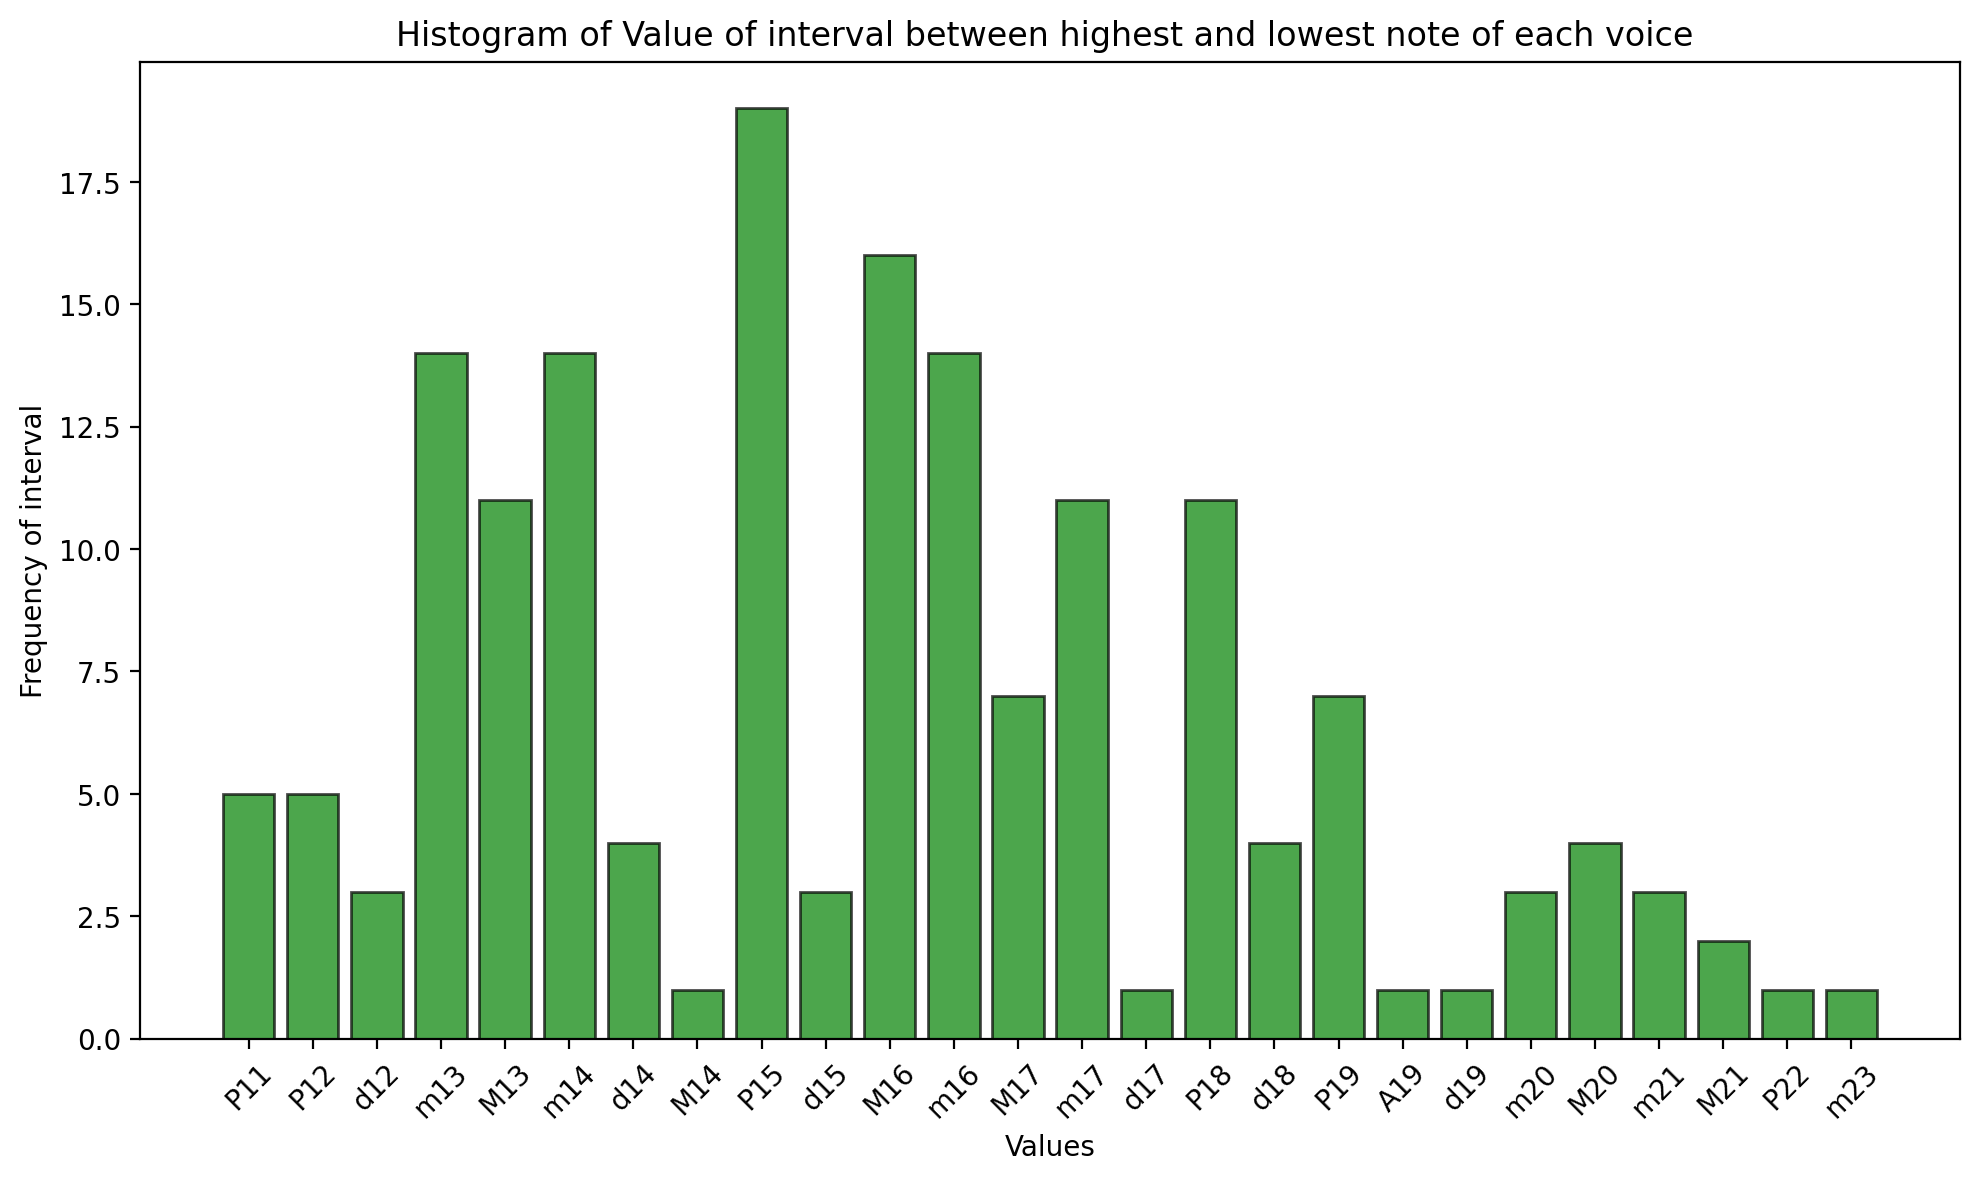

In [8]:
def plot_value_histogram(value_counts):
    # Values and their frequencies
    values = list(value_counts.keys())
    frequencies = list(value_counts.values())
    
    # Creating the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(values, frequencies, color='green', alpha=0.7, edgecolor='black')
    plt.title('Histogram of Value of interval between highest and lowest note of each voice ')
    plt.xlabel('Values')
    plt.ylabel('Frequency of interval')
    plt.xticks(rotation=45)  # Rotate labels if they overlap
    plt.tight_layout()  # Adjust layout to make room for label rotation
    plt.show()

# Plot the histogram
plot_value_histogram(value_counts)